In [1]:
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from PIL import ImageColor
import geopandas as gpd
import contextily as cx

/home/alh/PycharmProjects/.venv_spatial/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
### Read in CalEnviroScreen shapefile, from https://oehha.ca.gov/calenviroscreen/maps-data/download-data
shapefiles = glob.glob('*/*.shp')
ces = gpd.read_file(shapefiles[0])
ces

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6.037430e+09,91016,Los Angeles,Monrovia,5339,17.124832,30.610187,0.062365,88.699440,11.873339,...,17.4752,28.7132,53.3995,1.5733,0.0000,7.1549,7166.130635,1.938016e+06,9.1590,"POLYGON ((185152.883 -426843.064, 185240.372 -..."
8031,6.037431e+09,91007,Los Angeles,Arcadia,4365,13.841990,22.566818,0.059387,79.987554,11.816074,...,10.4926,10.9507,26.3918,3.3677,0.0000,3.3677,3941.781806,4.855630e+05,55.9221,"POLYGON ((179874.001 -429709.190, 179885.911 -..."
8032,6.037431e+09,91016,Los Angeles,Monrovia,6758,39.697849,74.508321,0.061338,84.579963,11.892654,...,7.2951,58.2273,16.1438,8.9967,0.0000,1.1098,8020.091253,3.015661e+06,15.5223,"POLYGON ((184530.475 -428031.241, 184535.255 -..."
8033,6.037534e+09,90201,Los Angeles,Bell,6986,62.931044,97.049924,0.046325,46.994400,12.019728,...,9.4188,91.4114,6.9425,0.6728,0.2577,0.7157,4949.116808,8.118955e+05,0.0000,"POLYGON ((167498.880 -447404.351, 167453.159 -..."


In [3]:
ces.columns

Index(['Tract', 'ZIP', 'County', 'ApproxLoc', 'TotPop19', 'CIscore',
       'CIscoreP', 'Ozone', 'OzoneP', 'PM2_5', 'PM2_5_P', 'DieselPM',
       'DieselPM_P', 'Pesticide', 'PesticideP', 'Tox_Rel', 'Tox_Rel_P',
       'Traffic', 'TrafficP', 'DrinkWat', 'DrinkWatP', 'Lead', 'Lead_P',
       'Cleanup', 'CleanupP', 'GWThreat', 'GWThreatP', 'HazWaste', 'HazWasteP',
       'ImpWatBod', 'ImpWatBodP', 'SolWaste', 'SolWasteP', 'PollBurd',
       'PolBurdSc', 'PolBurdP', 'Asthma', 'AsthmaP', 'LowBirtWt', 'LowBirWP',
       'Cardiovas', 'CardiovasP', 'Educatn', 'EducatP', 'Ling_Isol',
       'Ling_IsolP', 'Poverty', 'PovertyP', 'Unempl', 'UnemplP', 'HousBurd',
       'HousBurdP', 'PopChar', 'PopCharSc', 'PopCharP', 'Child_10',
       'Pop_10_64', 'Elderly65', 'Hispanic', 'White', 'AfricanAm', 'NativeAm',
       'OtherMult', 'Shape_Leng', 'Shape_Area', 'AAPI', 'geometry'],
      dtype='object')

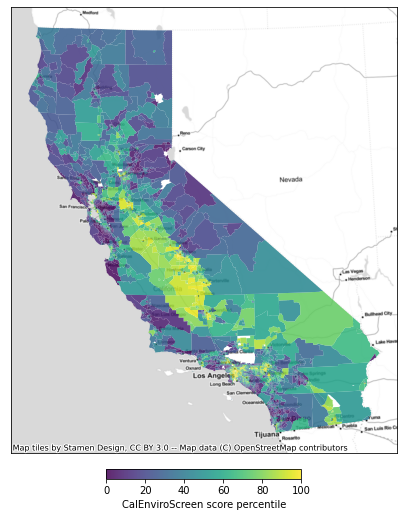

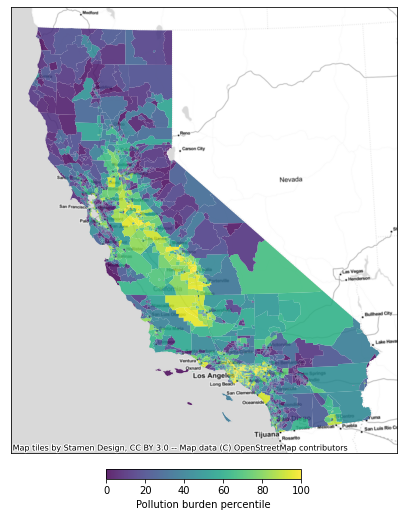

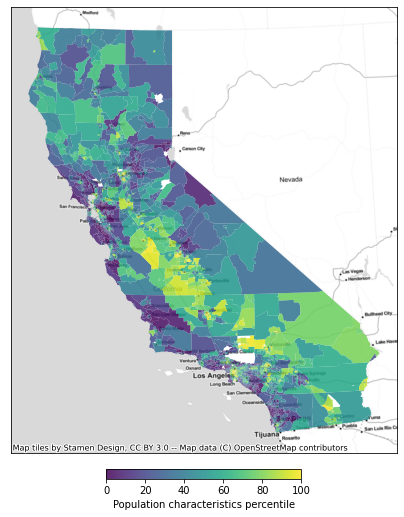

In [4]:
label_dict = {'CIscoreP': 'CalEnviroScreen score percentile', 
              'PolBurdP': 'Pollution burden percentile', 
              'PopCharP': 'Population characteristics percentile'}
alpha=0.85
dpi=300

for attr, label in label_dict.items():
    fig, ax = plt.subplots(1,1, figsize=(7,10))
    ces.loc[ces[attr] >= 0].plot(attr, ax=ax, alpha=alpha, vmin=0, legend=True, 
             legend_kwds={'label':label, 'orientation':'horizontal', 'shrink': 0.5, 'pad': 0.03, 'alpha':alpha})
    cx.add_basemap(ax = ax, crs=ces.crs, source=cx.providers.Stamen.TonerLite)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig(f'figs/{attr}.jpg', dpi=dpi, bbox_inches='tight')

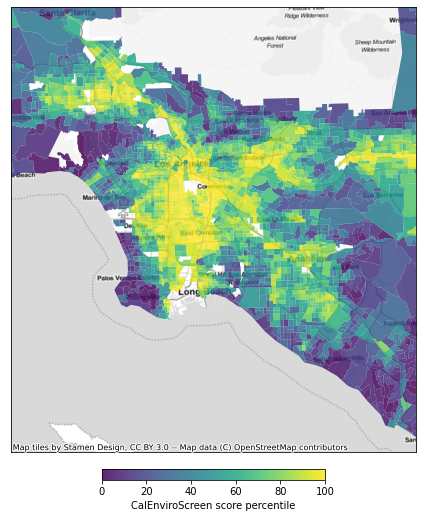

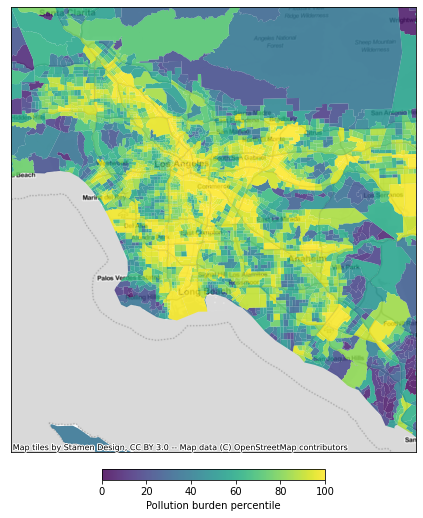

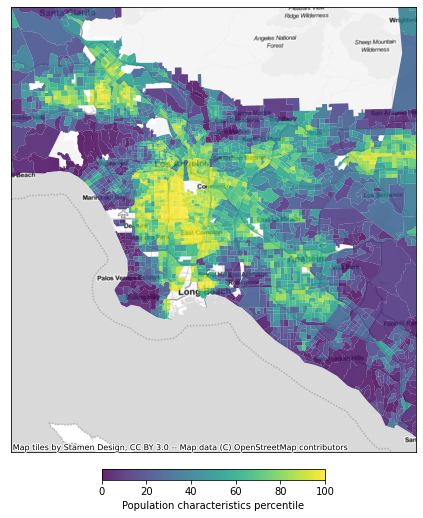

In [5]:
for attr, label in label_dict.items():
    fig, ax = plt.subplots(1,1, figsize=(8,10))
    ax.set_xlim([120000, 220000])
    ax.set_ylim([-510000, -400000])
    ces.loc[ces[attr] >= 0].plot(attr, ax=ax, alpha=alpha, vmin=0, legend=True, 
             legend_kwds={'label':label, 'orientation':'horizontal', 'shrink': 0.5, 'pad': 0.03, 'alpha':alpha})
    cx.add_basemap(ax = ax, crs=ces.crs, source=cx.providers.Stamen.TonerLite)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig(f'figs/{attr}_zoom.jpg', dpi=dpi, bbox_inches='tight')

In [6]:
### Get base corner colors from https://www.joshuastevens.net/cartography/make-a-bivariate-choropleth-map/,
### then do linear interpolation

jstevens = ['#E8E8E8', '#C5E0E0', '#A1D8D8', '#7ED0D0', '#5AC8C8',
            '#DEC7D9', '#BBBFD2', '#98B8CA', '#75B0C3', '#52A8BB',
            '#D3A6CA', '#B19FC3', '#8F98BC', '#6D90B5', '#4B89AE',
            '#C985BB', '#A87EB5', '#8677AE', '#6570A8', '#4369A1',
            '#BE64AC', '#9D5DA6', '#7D57A0', '#5C509A', '#3B4994']
percentile_bounds = [25, 50, 75, 95, 100]


In [7]:
### percentile bounds defining upper boundaries of color classes
percentile_bounds = [25, 50, 75, 100]

### function to convert hex color to rgb to Color object (generativepy package)
def hex_to_Color(hexcode):
    rgb = ImageColor.getcolor(hexcode, 'RGB')
    rgb = [v/256 for v in rgb]
    rgb = Color(*rgb)
    return rgb

### get corner colors from https://www.joshuastevens.net/cartography/make-a-bivariate-choropleth-map/
c00 = hex_to_Color('#e8e8e8')
c10 = hex_to_Color('#be64ac')
c01 = hex_to_Color('#5ac8c8')
c11 = hex_to_Color('#3b4994')

### now create square grid of colors, using color interpolation from generativepy package
num_grps = len(percentile_bounds)
c00_to_c10 = []
c01_to_c11 = []
colorlist = []
for i in range(num_grps):
    c00_to_c10.append(c00.lerp(c10, 1/(num_grps-1) * i))
    c01_to_c11.append(c01.lerp(c11, 1/(num_grps-1) * i))
for i in range(num_grps):
    for j in range(num_grps):
        colorlist.append(c00_to_c10[i].lerp(c01_to_c11[i], 1/(num_grps-1) * j))

### convert back to hex color
colorlist = [rgb2hex([c.r, c.g, c.b]) for c in colorlist]

In [8]:
### plot fraction inclusion for each district
def get_bivariate_choropleth_color(p1, p2):
    if p1>=0 and p2>=0:
        count = 0
        stop = False
        for percentile_bound_p1 in percentile_bounds:
            for percentile_bound_p2 in percentile_bounds:
                if (not stop) and (p1 <= percentile_bound_p1):
                    if (not stop) and (p2 <= percentile_bound_p2):
                        color = colorlist[count]
                        stop = True
                count += 1
    else:
        color = [0.8,0.8,0.8,1]
        
    return color


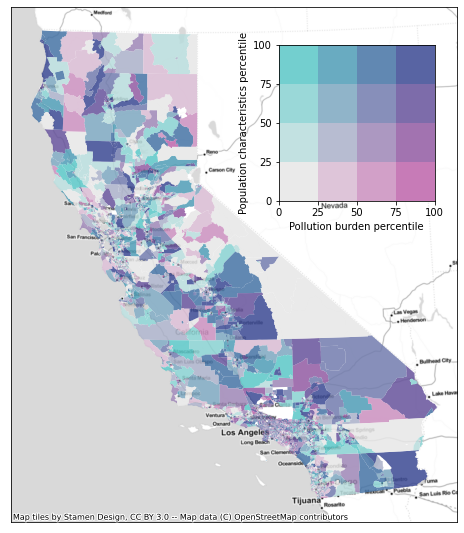

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,10))

attr = 'CIscoreP'
ces['color_bivariate'] = [get_bivariate_choropleth_color(p1, p2) for p1,p2 in zip(ces['PolBurdP'].values, ces['PopCharP'].values)]
ces.loc[ces[attr] >= 0].plot(ax=ax, color=ces['color_bivariate'], alpha=alpha, legend=False)
cx.add_basemap(ax = ax, crs=ces.crs, source=cx.providers.Stamen.TonerLite)
ax.set_xticks([])
ax.set_yticks([])


ax = ax.inset_axes([0.6,0.6,0.35,0.35])
ax.set_aspect('equal', adjustable='box')
count = 0
xticks = [0]
yticks = [0]
for i,percentile_bound_p1 in enumerate(percentile_bounds):
    for j,percentile_bound_p2 in enumerate(percentile_bounds):
        percentileboxes = [Rectangle((i,j), 1, 1)]
        pc = PatchCollection(percentileboxes, facecolor=colorlist[count], alpha=alpha)
        count += 1
        ax.add_collection(pc)
        if i == 0:
            yticks.append(percentile_bound_p2)
    xticks.append(percentile_bound_p1)

        
_=ax.set_xlim([0,len(percentile_bounds)])
_=ax.set_ylim([0,len(percentile_bounds)])
_=ax.set_xticks(list(range(len(percentile_bounds)+1)), xticks)
_=ax.set_xlabel('Pollution burden percentile')
_=ax.set_yticks(list(range(len(percentile_bounds)+1)), yticks)
_=ax.set_ylabel('Population characteristics percentile')

plt.savefig(f'figs/bivariate.jpg', dpi=dpi, bbox_inches='tight')

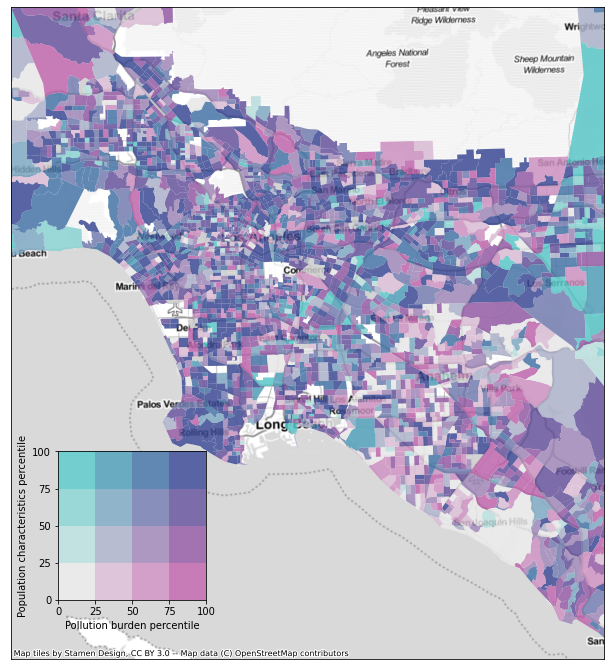

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12,12))

ax.set_xlim([120000, 220000])
ax.set_ylim([-510000, -400000])
ces['color_bivariate'] = [get_bivariate_choropleth_color(p1, p2) for p1,p2 in zip(ces['PolBurdP'].values, ces['PopCharP'].values)]
ces.loc[ces[attr] >= 0].plot(ax=ax, color=ces['color_bivariate'], alpha=alpha, legend=False)
cx.add_basemap(ax = ax, crs=ces.crs, source=cx.providers.Stamen.TonerLite)
ax.set_xticks([])
ax.set_yticks([])


ax = ax.inset_axes([0.08, 0.08,0.25,0.25])
ax.set_aspect('equal', adjustable='box')
count = 0
xticks = [0]
yticks = [0]
for i,percentile_bound_p1 in enumerate(percentile_bounds):
    for j,percentile_bound_p2 in enumerate(percentile_bounds):
        percentileboxes = [Rectangle((i,j), 1, 1)]
        pc = PatchCollection(percentileboxes, facecolor=colorlist[count], alpha=alpha)
        count += 1
        ax.add_collection(pc)
        if i == 0:
            yticks.append(percentile_bound_p2)
    xticks.append(percentile_bound_p1)

        
_=ax.set_xlim([0,len(percentile_bounds)])
_=ax.set_ylim([0,len(percentile_bounds)])
_=ax.set_xticks(list(range(len(percentile_bounds)+1)), xticks)
_=ax.set_xlabel('Pollution burden percentile')
_=ax.set_yticks(list(range(len(percentile_bounds)+1)), yticks)
_=ax.set_ylabel('Population characteristics percentile')

plt.savefig(f'figs/bivariate_zoom.jpg', dpi=dpi, bbox_inches='tight')